QUESTION:

Problem Details:

Download the data set fish1.txt about the catch of a hypothetical fishing fleet from Shared Drive and import it into Python. 

The data set records data for a time period of one day during which one fisherman has fished in a lake. The fisherman uses three types of fishing rods, labeled A, B, and C, each using different bait. The fisherman has recorded every catch he has made during this time. The data set consists of three columns with X values giving the times at which the fisherman has made a catch, the Y values indicate the size of that catch (i.e. its weight in kg), and the Z values give a letter A, B, or C which indicates which fishing rod was used to make that catch. Using Python, your task is to analyse this data set. In a first step, generate a plot that illustrates the distributions of X values (times of catch, the format is hours, fraction of hours on a 24h schedule for the day). Then also plot the distribution of Y values (size of catch), and finally generate a plot which analyses the effectiveness of each type of bait. Characterise and describe these distributions by measures of centrality, spread, and suitable additional measures introduced in the introduction to statistics lectures that you think shed light on the shape of the respective distributions. Assuming that the data are a sample from a larger population, give mean values with 95% confidence intervals for both distributions. In a second step, it is of interest to analyse the dependence between time of catch (X value) , size of catch (Y value), and the type of bait used (Z). Generate suitable plots to analyze these relationships and characterize them by statistical measures. 

What is the correlation between X and Y? Analyse the amount of information about Y that is given by knowledge of X. 

More generally, address the following questions and give support for your answers:

What is the best time to go fishing at this lake? 
Which bait is most effective? 
What is the best type of bait to use at 3pm in the afternoon?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats

In [96]:
df = pd.read_csv("fish1.txt",delim_whitespace=True,header=None,names=["X","Y","Z"])
df # eligible for z test

,X,Y,Z
0,15.25,2.40,B
1,7.43,1.66,C
2,7.17,2.75,C
3,2.93,1.21,A
4,11.07,0.39,C
...,...,...,...
395,8.34,0.83,A
396,14.37,2.67,C
397,2.63,3.55,C
398,7.28,1.05,A


X -> Time of catch; 
Y -> Size of catch; 
Z -> Kind of rod

### Countplot

<AxesSubplot:xlabel='Z', ylabel='count'>

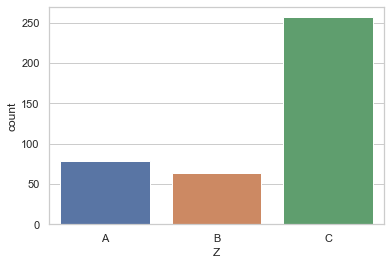

In [4]:
## Getting fishing count distribution - view in graphical form
sns.set_theme(style="whitegrid")
sns.countplot(x = "Z",data = df.sort_values(by = "Z"))

## Generate a plot that illustrates the distributions of X values (times of catch, the format is hours, fraction of hours on a 24h schedule for the day). Then also plot the distribution of Y values (size of catch), and finally generate a plot which analyses the effectiveness of each type of bait

## Distribution

#### Time and Weight of fish caught

Text(0.5, 1.0, 'Size distribution')

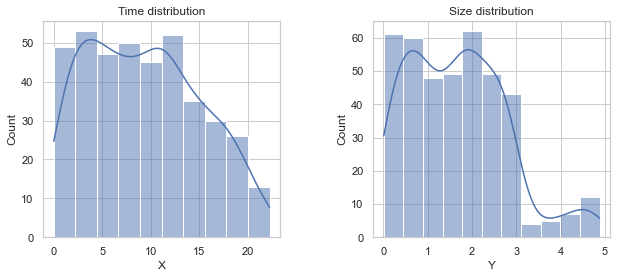

In [5]:
## Overall distribution of time and size
fig,axes = plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=5.0)
sns.histplot(df["X"],ax=axes[0],kde = True)
axes[0].set_title("Time distribution")
sns.histplot(df["Y"],ax=axes[1],kde = True)
axes[1].set_title("Size distribution")

### The time and size distributions are right skewed. 
#### Time Distribution insights:
* most fist is caught between 2:30 AM to 5 AM around 55 fist being caught, 
* next is at around 11 AM to 1 PM with around 50 fish
* post 1 PM, the fish caught continuously decreases with lowest reaching after 8 PM

#### Weight Distribution insights:
* There is a sudden decrease in number of fish caught having weight of fish heavier than 3kg, gradually increasing till 5 kg
* Most fish caught is between about 1.8 kg to 2.2 kg which is around 65
* 2nd highest is fish lighter than 0.3 kg around 60, closely followed by 0.3 to 1 kg around 60


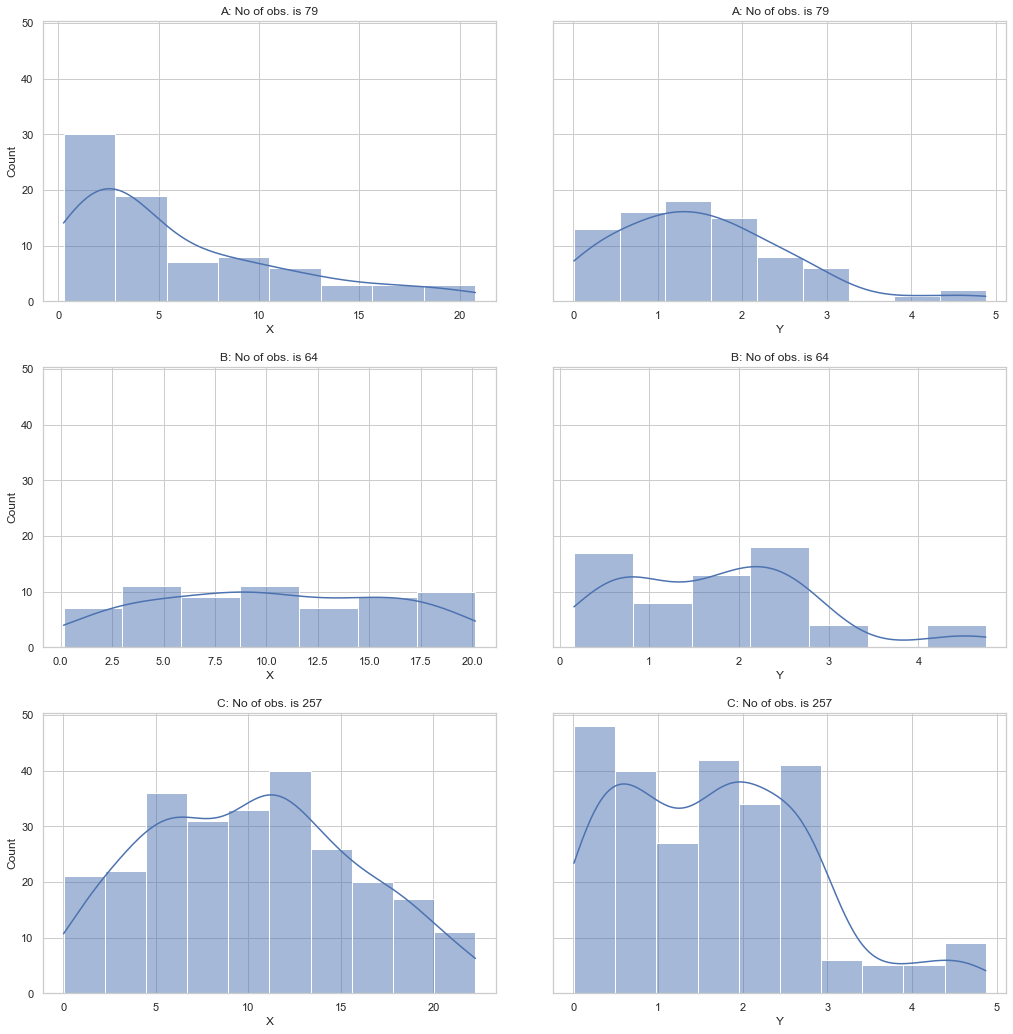

In [30]:
## Distribution of X and Y acoss bait types (Z)
# fig,ax = plt.subplots()
# sns.histplot(df[df["Z"] == "A"]["X"],ax=ax)
# ax.set_xticks(range(1,21))

fig,axes = plt.subplots(3,2,figsize=(15,15),sharey=True)
fig.tight_layout(pad=3.5)
sns.histplot(df[df["Z"] == "A"]["X"],ax=axes[0,0],kde = True)
count = df[df["Z"] == "A"]["X"].count()
axes[0,0].set_title(f"A: No of obs. is {count}")
axes[0,0].xlabel = "Time of catch"
sns.histplot(df[df["Z"] == "A"]["Y"],ax=axes[0,1],kde = True)
axes[0,1].set_title(f"A: No of obs. is {count}")
axes[0,1].xlabel = "Size of catch"

sns.histplot(df[df["Z"] == "B"]["X"],ax=axes[1,0],kde = True)
count = df[df["Z"] == "B"]["X"].count()
axes[1,0].set_title(f"B: No of obs. is {count}")
axes[1,0].xlabel = "Time of catch"
sns.histplot(df[df["Z"] == "B"]["Y"],ax=axes[1,1],kde = True)
axes[1,1].set_title(f"B: No of obs. is {count}")
axes[1,1].xlabel = "Size of catch"

sns.histplot(df[df["Z"] == "C"]["X"],ax=axes[2,0],kde = True)
count = df[df["Z"] == "C"]["X"].count()
axes[2,0].set_title(f"C: No of obs. is {count}")
axes[2,0].xlabel = "Time of catch"
sns.histplot(df[df["Z"] == "C"]["Y"],ax=axes[2,1],kde = True)
axes[2,1].set_title(f"C: No of obs. is {count}")
axes[2,1].xlabel = "Size of catch"

#### Distribution - time of catch
Observations:
1. Based on the df description, all three baits : A,B and C start and end parallelly, because:
    1. All have min time at around 12 AM and max time is around 8/10 PM
2. Bait A:
    1. Time : right skewed distribution
    2. Weight: right skewed distribution
3. Bait B:
    1. Time : uniform distribution
    2. Weight: unknown distribution
4. Bait C:
    1. Time : imperfect normal distribution
    2. Weight: unknown distribution
    
      Note: After around 2 PM there is a gradual decrease in the quantity of fish caught
    
5. Number of fish caught by bait C is the maximum (257) which is around 65% of total fish caught

Insights: 
1. Early morning from 12 AM to around 8 AM most of the fish was from Bait A
2. Between 12 and around 2 PM most of the fish were caught - about 40 of them

#### <span style="color:green"> Ans: Most effective bait based on number of fish caught is C

## Characterise and describe these distributions by measures of centrality, spread, and suitable additional measures introduced in the introduction to statistics lectures that you think shed light on the shape of the respective distributions

## Descriptive Statistics

In [7]:
print(df.describe())
print(f"Mode of 'X': {list(df['X'].mode().values)}")
print(f"Mode of 'Y': {list(df['Y'].mode().values)}")

                X          Y
count  400.000000  400.00000
mean     9.370525    1.66740
std      5.796400    1.10816
min      0.010000    0.01000
25%      4.325000    0.70750
50%      9.020000    1.61500
75%     13.747500    2.40000
max     22.270000    4.88000
Mode of 'X': [0.93, 3.11, 4.99]
Mode of 'Y': [0.11, 0.7, 0.87]


In [8]:
df["X"]

0      15.25
1       7.43
2       7.17
3       2.93
4      11.07
       ...  
395     8.34
396    14.37
397     2.63
398     7.28
399    12.38
Name: X, Length: 400, dtype: float64

## Assuming that the data are a sample from a larger population, give mean values with 95% confidence intervals for both distributions

In [41]:
### Using CLT to convert the distibution to normal distribution

time_no_of_samples = 100
time_samples = np.array(df["X"]).reshape([no_of_samples,len(df["X"])//no_of_samples])
time_nd = time_samples.mean(axis = 1)
print("Mean of the original time distribtion is:", df["X"].mean(), "and \nMean of the normalized time distribution is:", time_mean_sample.mean())
print("")
print("std of the original time distribtion is:", df["X"].std(), "and \nstd of the normalized time distribution is:", time_mean_sample.std()/np.sqrt(time_no_of_samples))

weight_no_of_samples = 200
weight_samples = np.array(df["Y"]).reshape([weight_no_of_samples,len(df["Y"])//weight_no_of_samples])
weight_nd = weight_samples.mean(axis = 1)
print("")
print("Mean of the original weight distribtion is:", df["Y"].mean(), "and \nMean of the normalized weight distribution is:", weight_mean_sample.mean())
print("")
print("std of the original weight distribtion is:", df["Y"].std(), "and \nstd of the normalized weight distribution is:", weight_mean_sample.std()/np.sqrt(weight_no_of_samples))


## Normal distributed metrics: time_nd, weight_nd

Mean of the original time distribtion is: 9.370524999999999 and 
Mean of the normalized time distribution is: 9.370525

std of the original time distribtion is: 5.796400445075735 and 
std of the normalized time distribution is: 0.4041771993739256

Mean of the original weight distribtion is: 1.6674000000000015 and 
Mean of the normalized weight distribution is: 1.6673999999999998

std of the original weight distribtion is: 1.108159638527389 and 
std of the normalized weight distribution is: 0.05368391239468301


Text(0.5, 1.0, 'Time Normal Distribution')

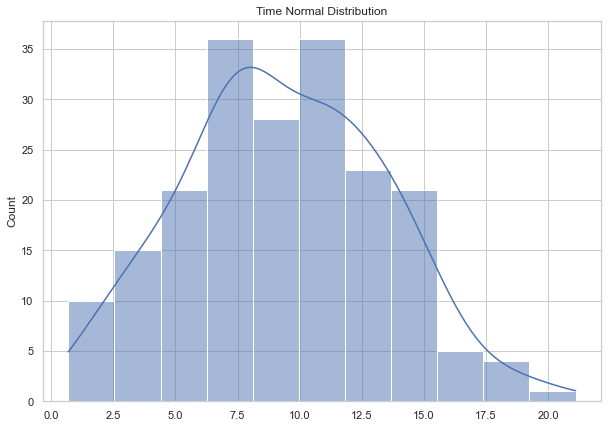

In [55]:
plt.figure(figsize=(10,7))
sns.histplot(time_nd,kde=True)
plt.title("Time Normal Distribution")

Text(0.5, 1.0, 'Weight Normal Distribution')

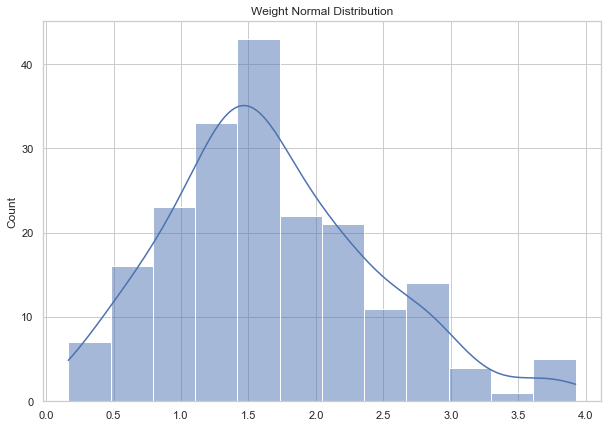

In [56]:
plt.figure(figsize=(10,7))
sns.histplot(weight_nd,kde=True)
plt.title("Weight Normal Distribution")

### Thus using CLT:
1. For time distribution:
* No of samples: 100
* sample unit count: 4
* original distribution mean, std: 9.370524999999999 , 5.796400445075735 
* normal distribution mean, std: 9.370525, 0.4041771993739256

2. For weight distribution:
* No of samples: 200
* sample unit count: 2
* original distribution mean, std: 1.6674000000000015  , 1.108159638527389 
* normal distribution mean, std: 1.6673999999999998,  0.05368391239468301

In [60]:
## 95% CI => 95% coverage from the mean of Normal distribution, which is mean +/- 2std

## Time mean range
time_mean_min = round(time_nd.mean()-(2*time_nd.std()),4)
time_mean_max = round(time_nd.mean()+(2*time_nd.std()),4)
print(f"The mean values of time between {time_mean_min} and {time_mean_max} denote population mean with 95% confidence")

## Weight mean range
weight_mean_min = round(weight_nd.mean()-(2*weight_nd.std()),4)
weight_mean_max = round(weight_nd.mean()+(2*weight_nd.std()),4)
print(f"The mean values of weight between {weight_mean_min} and {weight_mean_max} denote population mean with 95% confidence")

The mean values of time between 1.287 and 17.4541 denote population mean with 95% confidence
The mean values of weight between 0.149 and 3.1858 denote population mean with 95% confidence


#### <span style="color:red">Q. Using CLT when we reshape the curve to normal distribution we are reducing the data size, how do we ensure this can be modelled with other variables, if the data size reduces?</span>.


## In a second step, it is of interest to analyse the dependence between time of catch (X value) , size of catch (Y value), and the type of bait used (Z). Generate suitable plots to analyze these relationships

In [95]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Figure size 720x504 with 0 Axes>

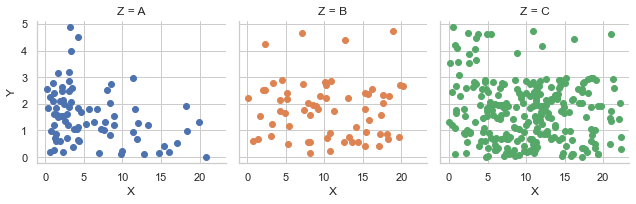

In [104]:
plt.figure(figsize = (10,7))
graph = sns.FacetGrid(col="Z",hue = "Z",data = df.sort_values(by = "Z"))
graph.map(plt.scatter, "X","Y")
plt.show()

#### <span style="color:green"> We do not see a relation between Time of fish catch (X) and weight of the fish (Y), though majority of the fish caught by A,B, and C baits have weight below 3 kg.

### characterize them by statistical measures

In [107]:
df.groupby("Z").corr()

X         Y
Z                      
A X  1.000000 -0.321684
  Y -0.321684  1.000000
B X  1.000000 -0.049639
  Y -0.049639  1.000000
C X  1.000000 -0.125740
  Y -0.125740  1.000000

#### <span style="color:green"> Based on the above correlation result, we see that there is not much relation between across the weight of the fish and the time of catch.

## What is the correlation between X and Y? Analyse the amount of information about Y that is given by knowledge of X. 

In [108]:
df.corr()

,X,Y
X,1.000000,-0.120593
Y,-0.120593,1.000000


Correlation between X and Y is -0.12, meaning increase of X by 1 time reduces Y by 0.12 times

## What is the best time to go fishing at this lake?

C:\Users\sairaghunath.k\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


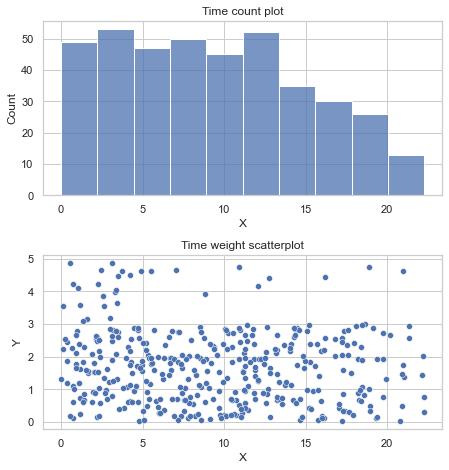

In [148]:
figure,axes = plt.subplots(2,1,figsize = (7,7))
figure.tight_layout(pad=3.0)
sns.histplot(df["X"],ax=axes[0])
axes[0].set_title("Time count plot")
sns.scatterplot(df["X"],df["Y"],ax=axes[1])
axes[1].set_title("Time weight scatterplot")
plt.show()

#### <span style ="color:green"> Ans: We see wrt weight distribution, that there is no correlation with time, so going by quantity of fish caught, there are about 3 time hotspots where we are able to catch more fish: [1:30 AM to 3:30 AM], [7:30 AM to 9:30 AM] and [12 PM to 2 PM]

## Which bait is most effective? 

In [156]:
bait_count = df.groupby("Z")["X"].count()
bait_weight = df.groupby("Z")["X"].sum()
weight_per_bait = bait_weight/bait_count
print("Count of Fish caught")
print(bait_count,"\n")
print("Average weight of Fish caught")
print(weight_per_bait)

Count of Fish caught
Z
A     79
B     64
C    257
Name: X, dtype: int64 

Average weight of Fish caught
Z
A     5.849747
B    10.384219
C    10.200350
Name: X, dtype: float64


#### <span style="color:green"> Ans: Based on count of fish bait C is the best and based on the weight per bait, bait B is the best (slightly better than C)